<a href="https://colab.research.google.com/github/Srubanza/lung-cancer-prediction/blob/main/joseph_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
#connect to the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
# define the path and split your data for training, validation and testing
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset")
ds_train= tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset",
validation_split=0.3,
subset="training",
seed=123)
ds_valid= tf.keras.preprocessing.image_dataset_from_directory("/content/gdrive/MyDrive/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset",
validation_split=0.3,
subset="validation",
seed=123)



Found 1097 files belonging to 3 classes.
Found 1097 files belonging to 3 classes.
Using 768 files for training.
Found 1097 files belonging to 3 classes.
Using 329 files for validation.


In [34]:
from tensorflow_datasets.public_api import dataset_builders
# define the batch size and print the image levels
import tensorflow_datasets as tfds
batch_size=32
dataset_name=dataset
class_names=dataset.class_names
print(class_names)

['Bengin cases', 'Malignant cases', 'Normal cases']


In [35]:

# resize the images and standardise the data to make it for a nueral networks
size = (512,512)
ds_train = ds_train.map(lambda image,label:(tf.image.resize(image,size), label))
ds_valid = ds_valid.map(lambda image,label:(tf.image.resize(image,size), label))

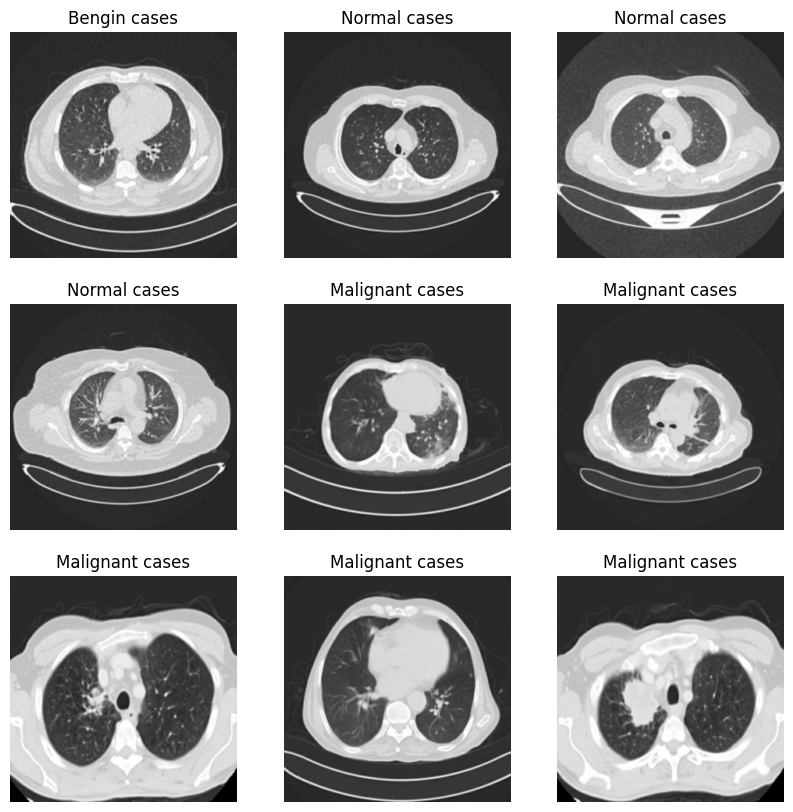

In [36]:
#display the first 9 images
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[1].numpy().astype("uint8"))
    plt.title(class_names[label[1]])
    plt.axis("off")

plt.show()



In [48]:
!git clone https://github.com/Srubanza/lung-cancer-prediction.git

Cloning into 'lung-cancer-prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [37]:
# futher preprocessing to increase instance of images
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

image = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), interpolation='bilinear'),
    layers.experimental.preprocessing.RandomContrast(factor=0.1),
    layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
], name="image")






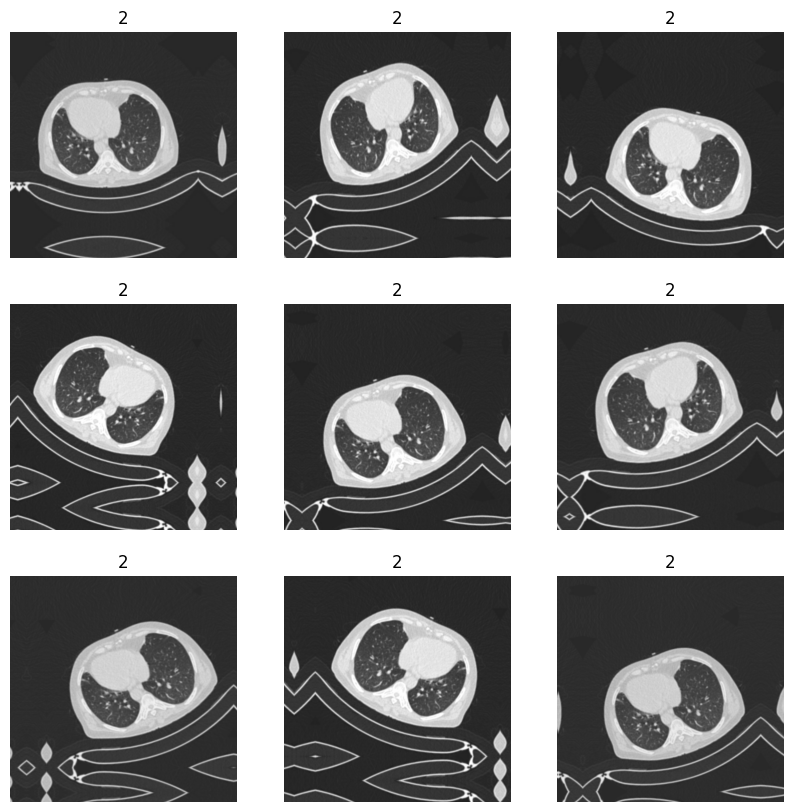

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create a Sequential model for image augmentation
image = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), interpolation='bilinear'),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.1),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
], name="image_augmentation")

# Create a function to convert a tensor to an integer
def to_int(x):
    return int(x)

# Create a vectorized version of the function for labels
to_int_v = np.vectorize(to_int)

# Iterate through the dataset and display augmented images
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = image(tf.expand_dims(first_image, 0), training=True)

        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(to_int_v(labels[0]))
        plt.axis("off")

plt.show()
